In [1]:
import pm4py

In [2]:
log = pm4py.read_xes("..\..\Dataset\BPI Challenge 2017.xes")

C:\Users\nicol\Desktop\Repos\BPPSO - Assignment 1\pm4py\pm4py\utils.py:987: UserWarning: In the current version, the import/export operation uses `rustxes` by default for importing/exporting files faster. Please uninstall `rustxes` to revert the behavior.
  warnings.warn("In the current version, the import/export operation uses `rustxes` by default for importing/exporting files faster. Please uninstall `rustxes` to revert the behavior.")


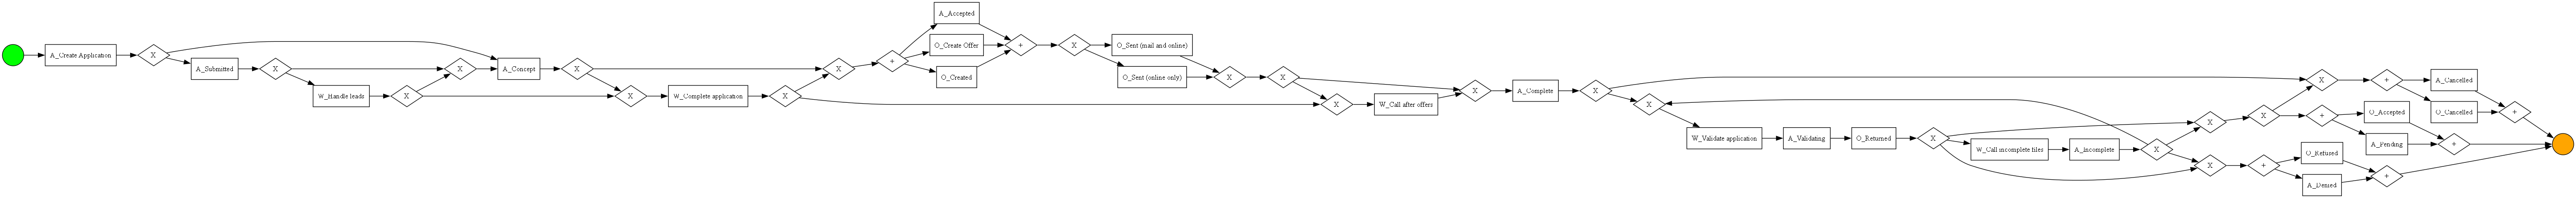

In [ ]:
model = pm4py.read_bpmn("Process Models\Process Model v6.bpmn")
pm4py.view_bpmn(model)

In [ ]:
petri_nets = [("v6",*pm4py.convert_to_petri_net(model))]

In [ ]:
from pm4py import conformance_diagnostics_alignments


name,net,initial_marking, final_marking = petri_nets[0]
align_results = conformance_diagnostics_alignments(log, net, initial_marking, final_marking)
print(str(align_results))

In [5]:
import pm4py
import traceback
import math
from simplicity_metrics import entropy_simplicity_petri_net, size_simplicity_metric

for name, net, im, fm in petri_nets:
    print(f"--- {name} ---")

    # ----------------------------
    # Token-based replay fitness
    # ----------------------------
    try:
        tbr_fitness = pm4py.fitness_token_based_replay(log, net, im, fm)
        print("Token-based replay fitness:")
        for k, v in tbr_fitness.items():
            print(f"  {k}: {v}")
    except Exception:
        print("Error computing token-based replay fitness:")
        traceback.print_exc()
        tbr_fitness = {}

    # ----------------------------
    # Alignment-based fitness
    # ----------------------------
    """try:
        align_fitness = pm4py.fitness_alignments(log, net, im, fm)
        print("\nAlignment-based fitness:")
        for k, v in align_fitness.items():
            print(f"  {k}: {v}")
    except Exception:
        print("Error computing alignment-based fitness:")
        traceback.print_exc()
        align_fitness = {}"""
    # ----------------------------
    # Token-based replay precision
    # ----------------------------
    try:
        tbr_precision = pm4py.precision_token_based_replay(log, net, im, fm)
        print("\nToken-based replay precision:")
        print(f"  precision: {tbr_precision}")
    except Exception:
        print("Error computing token-based replay precision:")
        traceback.print_exc()
        tbr_precision = math.nan

    # ----------------------------
    # Alignment-based precision
    # ----------------------------
    """try:
        align_precision = pm4py.precision_alignments(log, net, im, fm)
        print("\nAlignment-based precision:")
        print(f"  precision: {align_precision}")
    except Exception:
        print("Error computing alignment-based precision:")
        traceback.print_exc()
        align_precision = math.nan"""

    # ----------------------------
    # Simplicity metrics
    # ----------------------------
    try:
        simplicity_arc = pm4py.simplicity_petri_net(net, im, fm, variant="arc_degree")
    except Exception:
        print("Error computing arc-degree simplicity:")
        traceback.print_exc()
        simplicity_arc = math.nan

    """try:
        simplicity_cardoso = pm4py.simplicity_petri_net(net, im, fm, variant="extended_cardoso")
    except Exception:
        print("Error computing Cardoso simplicity:")
        traceback.print_exc()
        simplicity_cardoso = math.nan

    try:
        simplicity_cyclomatic = pm4py.simplicity_petri_net(net, im, fm, variant="extended_cyclomatic")
    except Exception:
        print("Error computing Cyclomatic simplicity:")
        traceback.print_exc()
        simplicity_cyclomatic = math.nan"""

    try:
        simplicity_entropy = entropy_simplicity_petri_net(net)
    except Exception:
        print("Error computing entropy-based simplicity:")
        traceback.print_exc()
        simplicity_entropy = {'entropy': math.nan, 'simplicity': math.nan}

    try:
        simplicity_size = size_simplicity_metric(net)
    except Exception:
        print("Error computing size-based simplicity:")
        traceback.print_exc()
        simplicity_size = math.nan

    print("\nSimplicity:")
    print(f"  simplicity_arc_degree: {simplicity_arc:.4f}" if isinstance(simplicity_arc, (float, int)) else f"  simplicity_arc_degree: {simplicity_arc}")
    #print(f"  simplicity_cardoso: {simplicity_cardoso:.4f}" if isinstance(simplicity_cardoso, (float, int)) else f"  simplicity_cardoso: {simplicity_cardoso}")
    #print(f"  simplicity_cyclomatic: {simplicity_cyclomatic:.4f}" if isinstance(simplicity_cyclomatic, (float, int)) else f"  simplicity_cyclomatic: {simplicity_cyclomatic}")
    print(f"  entropy: {simplicity_entropy['entropy']:.4f}")
    print(f"  simplicity_entropy: {simplicity_entropy['simplicity']:.4f}")
    print(f"  simplicity_size: {simplicity_size:.4f}")

    # ----------------------------
    # Generalization
    # ----------------------------
    try:
        generalization = pm4py.generalization_tbr(log, net, im, fm)
        print("\nGeneralization:")
        print(f"  generalization: {generalization:.4f}")
    except Exception:
        print("Error computing generalization:")
        traceback.print_exc()
        generalization = math.nan
    print("\n" + "-" * 50 + "\n")

--- v5 ---


c:\Users\nicol\Desktop\Repos\BPPSO - Assignment 1\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
replaying log with TBR, completed traces :: 100%|██████████| 15930/15930 [01:19<00:00, 199.98it/s]


Token-based replay fitness:
  perc_fit_traces: 0.0
  average_trace_fitness: 0.7324491705908596
  log_fitness: 0.7022682726525926
  percentage_of_fitting_traces: 0.0


replaying log with TBR, completed traces :: 100%|██████████| 263907/263907 [02:51<00:00, 1538.79it/s]



Token-based replay precision:
  precision: 0.5820017606759422

Simplicity:
  simplicity_arc_degree: 0.7444
  entropy: 0.2646
  simplicity_entropy: 0.9538
  simplicity_size: 215.0000


replaying log with TBR, completed traces :: 100%|██████████| 15930/15930 [01:19<00:00, 199.27it/s]



Generalization:
  generalization: 0.9528

--------------------------------------------------

